<a href="https://colab.research.google.com/github/MJaiman/Data-Analytics/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset link: https://www.kaggle.com/austinreese/craigslist-carstrucks-data**

In [1]:
#install kaggle
!pip install -q kaggle

In [ ]:
# from google.colab import files
# files.upload() 

In [3]:
! mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              233KB  2021-08-15 09:48:42          10668  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           6524  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2456  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2651  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [7]:
! kaggle datasets download -d austinreese/craigslist-carstrucks-data


 94% 247M/262M [00:01<00:00, 147MB/s]
100% 262M/262M [00:02<00:00, 125MB/s]


In [8]:
!unzip craigslist-carstrucks-data.zip

Archive:  craigslist-carstrucks-data.zip
  inflating: vehicles.csv            


In [9]:
import pandas as pd

In [10]:
data = pd.read_csv('vehicles.csv')

In [11]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [12]:
data.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [13]:
#remove duplicates
data.drop_duplicates(inplace= True)

In [14]:
#check for null values or % of values
data.isnull().any()
data.isnull()/data.shape[0]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,0.0,0.0,0.0,0.0,0.0,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.0,0.000002,0.000002,0.000002
1,0.0,0.0,0.0,0.0,0.0,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.0,0.000002,0.000002,0.000002
2,0.0,0.0,0.0,0.0,0.0,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.0,0.000002,0.000002,0.000002
3,0.0,0.0,0.0,0.0,0.0,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.0,0.000002,0.000002,0.000002
4,0.0,0.0,0.0,0.0,0.0,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.0,0.000002,0.000002,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,0.000000,0.000002,0.000000,0.000000,0.000002,0.0,0.000000,0.000000,0.000000
426876,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000002,0.0,0.000000,0.000000,0.000000
426877,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,0.000002,0.000000,0.000000,0.000000,0.000000,0.000002,0.0,0.000000,0.000000,0.000000
426878,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000002,0.0,0.000000,0.000000,0.000000


In [15]:
#remove null columns over threshold
thresh= len(data)*6
data.dropna(thresh=thresh, axis=1).shape
data.dropna(thresh=21, axis=0).shape

(350166, 26)

In [16]:
#imputing null values
data.odometer.fillna(data.odometer.median()).isnull().any()
data.odometer.fillna(data.odometer.mean()).isnull().any()

False

In [17]:
#convert text to upper or lower
data.description.tail()
data.description.tail().apply(lambda x: x.lower())
data.description.tail().apply(lambda x: x.upper())

426875    CARVANA IS THE SAFER WAY TO BUY A CAR DURING T...
426876    CARVANA IS THE SAFER WAY TO BUY A CAR DURING T...
426877    CARVANA IS THE SAFER WAY TO BUY A CAR DURING T...
426878    CARVANA IS THE SAFER WAY TO BUY A CAR DURING T...
426879    CARVANA IS THE SAFER WAY TO BUY A CAR DURING T...
Name: description, dtype: object

In [18]:
#covert to string
data.description.astype(str).tail(10).apply(lambda x: x.lower())
data.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

In [20]:
#to float
data.cylinders.tail()
data.cylinders.value_counts()
data.cylinders= data.cylinders.apply(lambda x: str(x).lower().replace('cylinders','').strip())
data.cylinders.value_counts()

data.cylinders = pd.to_numeric(data.cylinders, errors='coerce')
data.cylinders.isnull().sum()
data.cylinders.fillna(data.cylinders.mean(),inplace = True)

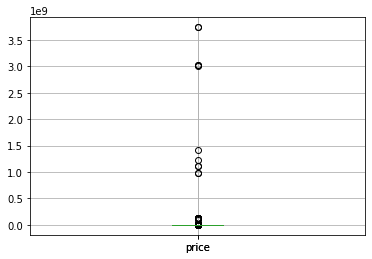

In [23]:
#visualizations
data.boxplot('odometer')
data.boxplot('price')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6b9b6af50>]],
      dtype=object)

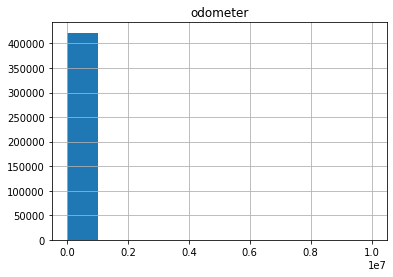

In [24]:
data.hist('odometer')